In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['image.cmap'] = 'viridis'

In [4]:
st_df = pd.read_pickle('../data/st_trails_df')

In [151]:
view_cols = set(st_df.columns).difference(set(['directions', 'thumbnail','city', 'country', 'features', \
                                               'rating_rounded', 'length_rounded', 'url']))
not_cols = ['directions', 'thumbnail','city', 'country', 'features', \
                                               'rating_rounded', 'length_rounded', 'url']
view_cols2 = ['id', 'name', 'length', 'description', 'region', 'lat', 'lon', 'difficulty', 'rating', 'description_length']
st_df[view_cols2].head()

,id,name,length,description,region,lat,lon,difficulty,rating,description_length
0,402,Dans Trail,4.0,McDonald Dunn Forest offers and incredible var...,Oregon,44.60392,-123.33257,beginner,4.22,1171
1,541,Pyramid / Sturgeon Rock Trail,10.0,Ride north up and keep to the left at the firs...,Washington,45.74932,-122.32628,intermediate,4.00,286
2,544,Lewis River,14.0,The trail starts on the far side of the bridge...,Washington,46.06212,-121.96725,intermediate,4.40,1425
3,690,Juniper Ridge,11.0,"""DESCRIPTION: This description is from north t...",Washington,46.39648,-121.76532,advanced,4.00,1032
4,1007,Molalla River Recreation Corridor,10.0,There are several rides at the Hardy Creek tra...,Oregon,45.14735,-122.57703,intermediate,3.75,258


In [12]:
st_df['features'].unique()

array(['Night riding allowed', '',
       'Night riding allowed, Restrooms, Fat biking allowed in winter',
       'Drinking water, Restrooms',
       'Drinking water, Night riding allowed, Restrooms',
       'Night riding allowed, Restrooms', 'Restrooms',
       'Drinking water, Night riding allowed, Pump track, Restrooms',
       'Night riding allowed, Fat biking allowed in winter',
       'Restrooms, Fat biking allowed in winter',
       'Fat biking allowed in winter',
       'Drinking water, Lift service, Restrooms, Fee required',
       'Night riding allowed, Pump track',
       'Drinking water, Lift service, Restrooms',
       'Night riding allowed, Restrooms, E-bikes permitted',
       'Lift service, Night riding allowed, Restrooms', 'Lift service',
       'Drinking water, Restrooms, Fat biking allowed in winter',
       'E-bikes permitted',
       'Drinking water, Night riding allowed, Restrooms, Fat biking allowed in winter',
       'Drinking water, Pump track, Restrooms',
    

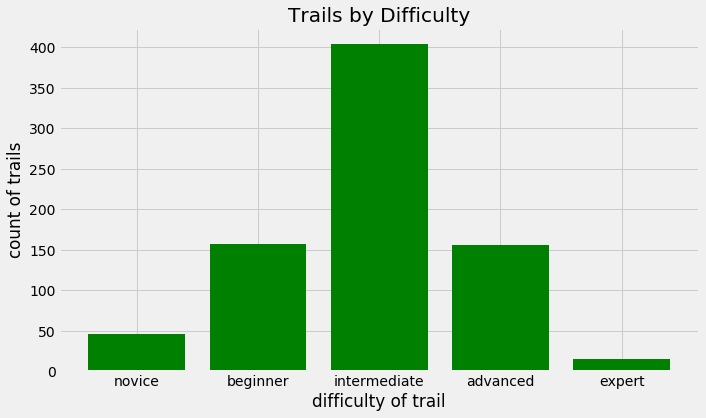

In [153]:
y = st_df[['difficulty', 'id']].groupby(by='difficulty').count().reset_index()
order = np.array(['novice', 'beginner', 'intermediate', 'advanced', 'expert', None])
order_dict = {difficulty:np.argwhere(order==difficulty)[0][0] for difficulty in order}
y['order'] = np.zeros(len(y))
for i, diffy in enumerate(order):
    y.loc[y['difficulty']==diffy, 'order'] = order_dict[diffy]
y = y.sort_values(by='order')

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(y.shape[0])
labels = y['difficulty']
ax.bar(x, y['id'], color='g')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('difficulty of trail')
ax.set_title('Trails by Difficulty')
fig.tight_layout(pad=1)
fig.savefig('../images/st_Trails_by_difficulty_ordered.png')

In [27]:
st_df['rating_rounded'] = st_df['rating'].apply(lambda x: np.round(float(x), 1))
st_df['rating_rounded']

0      4.2
1      4.0
2      4.4
3      4.0
4      3.8
      ... 
950    0.0
951    0.0
952    0.0
953    0.0
954    0.0
Name: rating_rounded, Length: 955, dtype: float64

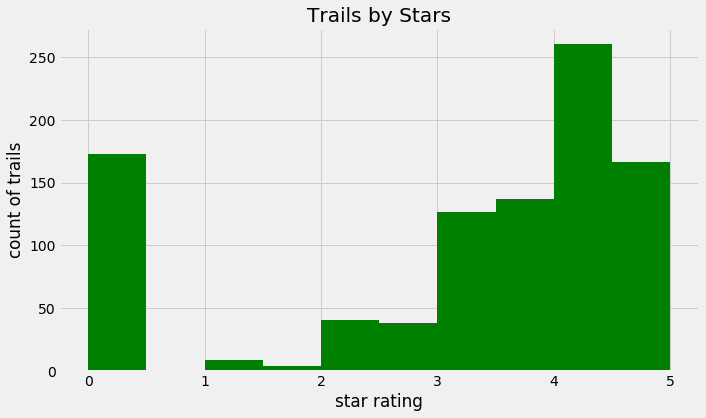

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
dummy = np.array([1, 1, 2, 2, 1, 5, 5, 5])
ax.hist(st_df['rating_rounded'].values, color='g')
ax.set_ylabel('count of trails')
ax.set_xlabel('star rating')
ax.set_title('Trails by Stars')

fig.tight_layout(pad=1)
fig.savefig('../images/st_Trails_by_stars.png')

In [35]:
st_df['length_rounded'] = st_df['length'].apply(lambda x: np.round(float(x), 0))
len(st_df['length_rounded'].unique())

57

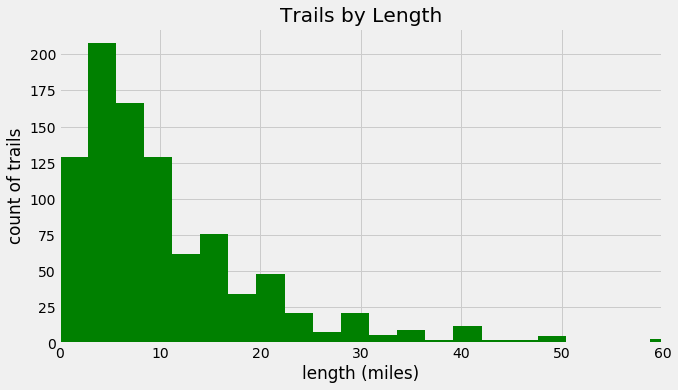

In [160]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(st_df['length_rounded'], bins=50, color='g')
ax.set_xlim(0, 60)
ax.set_ylabel('count of trails')
ax.set_xlabel('length (miles)')
ax.set_title('Trails by Length')

fig.tight_layout(pad=2)
# fig.savefig('../images/st_trails_by_length.png')
# st_df['length_rounded'].max()

top words hist ... word cloud...  stop words
PCA chart? clusters?
n-grams
stop words
CV vs TF-IDF

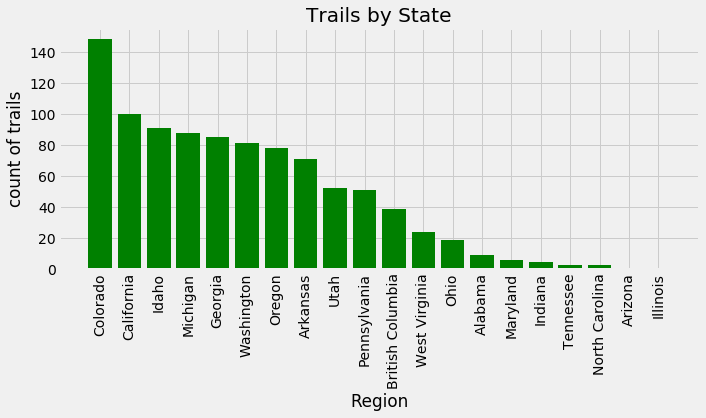

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
y = st_df['region'].value_counts()
x = np.arange(len(y))
labels = y.index
ax.bar(x, y, color='g')
plt.xticks(x, labels, rotation='vertical')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('Region')
ax.set_title('Trails by State')

fig.tight_layout(pad=1)
fig.savefig('../images/st_trails_by_state.png')

In [71]:
st_df['description_length'] = st_df['description'].apply(lambda x: len(x))
len(st_df[st_df['description_length']<=40]['description'])
st_df[(st_df['description_length']<=40)]['description']

36                                       epic
66                               Flow & views
73        Off the face from the top of Dimple
93                              Fall line fun
94      Gravel surface.  Repurposed rail bed.
95      Gravel surface.  Repurposed rail bed.
117       this trail is tough...  be prepared
289                    Great mountain biking.
320      Rails to trails, very boring to me. 
353    Rolling hills singletrack. Hidden gem.
368                         Rocky singletrack
383                                Rail Trail
384        Railroad Grade Turned Singletrack!
398                     new trail in new park
419                    Fun sandy areas though
472      Network of trails.\r\n(Varied types)
549                             Short but fun
570                             Great trails.
578         Plenty of mountain biking trails.
580                       Nice biking trails.
581                    Great mountain biking.
589       Great system of Intermed

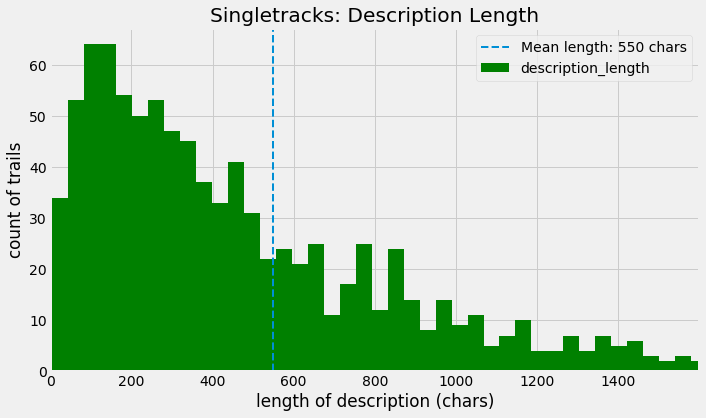

In [167]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(st_df['description_length'], bins=150, color='g')
avg = round(st_df['description_length'].mean())
ax.axvline(x=avg, linestyle='--', linewidth=2, label=f'Mean length: {avg} chars')
ax.set_xlim(0, 1600)
ax.set_xticks(np.arange(0, 1600, 200))
ax.set_ylabel('count of trails')
ax.set_xlabel('length of description (chars)')
ax.set_title('Singletracks: Description Length')
ax.legend()

fig.tight_layout(pad=1)
fig.savefig('../images/st_description_length.png')

In [72]:
st_df.to_pickle('../data/st_trails_df_2')

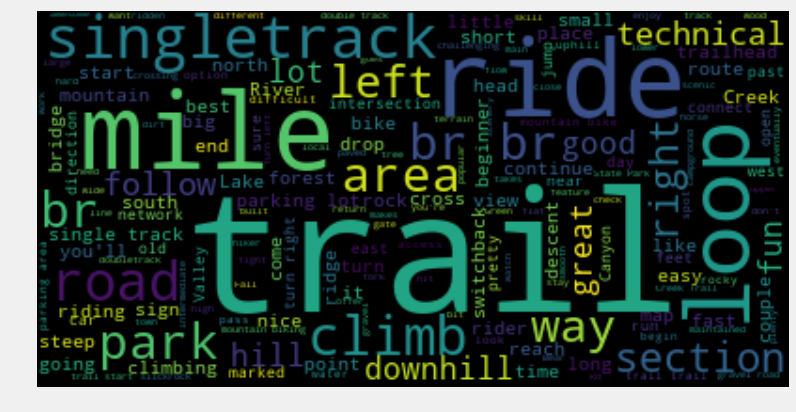

In [163]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

nltk_stopwords = set(stopwords.words('english'))
gensim_stopwords = STOPWORDS
# my_stopwords = set(['trail', 'trails', 'loop','br', \
#                     'mile', 'miles','ride', 'area', 'route', 'way', \
#                     'feature', 'section', 'ride', 'riding'\
#                     'north', 'south', 'east', 'west', 'right', 'left'])
# all_stopwords = my_stopwords.union(nltk_stopwords.union(gensim_stopwords))

text = ''
for desc in st_df[st_df['description_length']>=40]['description']:
    text += desc
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off');

In [165]:
wordcloud.to_file("../images/st_wordcloud1.png")

In [83]:
run st_nlp.py

Topic 0:
['river' 'good' 'narrow' 'hikers' 'traffic' 'spots' 'foot' 'worth'
 'expect' 'run']
Topic 1:
['lake' 'climbs' 'good' 'peak' 'views' 'technical' 'fun' 'areas' 'camp'
 'great']
Topic 2:
['mountain' 'jumps' 'features' 'big' 'advanced' 'hills' 'beginner' 'built'
 'open' 'large']
Topic 3:
['rd' 'springs' 'nice' 'hot' 'mi' 'crosses' 'great' 'pine' 'killpecker'
 'fr']
Topic 4:
['mountain' 'great' 'map' 'technical' 'different' 'sure' 'network' 'lots'
 'bull' 'pretty']
Topic 5:
['valley' 'slickrock' 'sand' 'scenery' 'plenty' 'rim' 'moab' 'great'
 'sweet' 'rough']
Topic 6:
['little' 'rocks' 'fun' 'climbs' 'river' 'technical' 'direction' 'red'
 'good' 'easy']
Topic 7:
['park' 'lake' 'hiking' 'state' 'mountain' 'biking' 'areas' 'open'
 'forest' 'fs']
Topic 8:
['track' 'single' 'great' 'roads' 'place' 'double' 'technical' 'loops'
 'skills' 'wide']
Topic 9:
['road' 'creek' 'climb' 'follow' 'downhill' 'steep' 'ridge' 'canyon'
 'head' 'end']
Model perplexity: 806.261


In [121]:
diff_dict = {'novice': 'limegreen', 'beginner': 'deepskyblue', \
                                              'intermediate':'mediumblue', 'advanced':'black', \
                                              'expert':'black', None:'white'}



In [124]:
y = st_df_with_desc['difficulty'].map(diff_dict)
diff_dict
y.value_counts()

mediumblue     395
black          168
white          163
deepskyblue    153
limegreen       43
Name: difficulty, dtype: int64

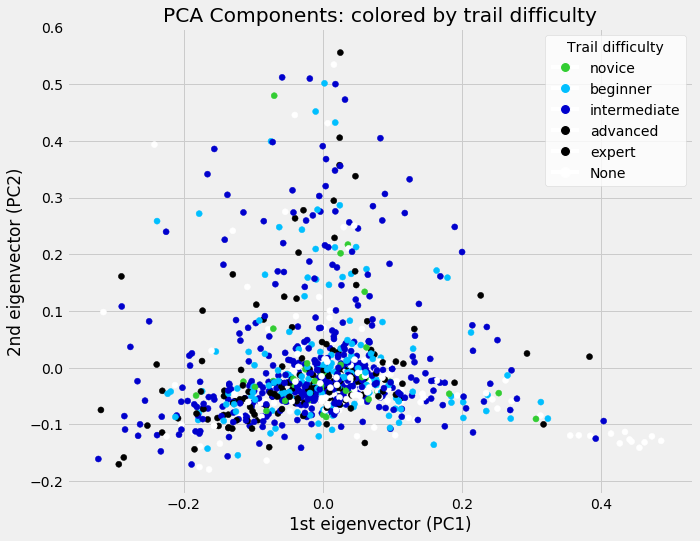

In [127]:
from matplotlib.lines import Line2D

legend_elements2 = []
for difficulty, color in diff_dict.items():
    line = Line2D([0], [0], marker='o', color='w', label=difficulty,
                          markerfacecolor=color, markersize=10)
    legend_elements2.append(line)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y)
ax.set_title("PCA Components: colored by trail difficulty")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
ax.legend(handles=legend_elements2, facecolor='w', title='Trail difficulty')

fig.savefig('../images/st_PCA_difficulty.png');

In [128]:
colors = ['red', 'orange', 'yellow', 'limegreen', 'blue', 'purple', 'black', 'white', 'cyan', 'pink', 'peru']
state_dict = {state: colors[ind%11] for ind, state in enumerate(st_df_with_desc['region'].unique())}
y2 = st_df_with_desc['region'].map(state_dict)
state_dict

{'Oregon': 'red',
 'Washington': 'orange',
 'Colorado': 'yellow',
 'Utah': 'limegreen',
 'Ohio': 'blue',
 'Pennsylvania': 'purple',
 'West Virginia': 'black',
 'Maryland': 'white',
 'California': 'cyan',
 'British Columbia': 'pink',
 'Illinois': 'peru',
 'Idaho': 'red',
 'Alabama': 'orange',
 'Tennessee': 'yellow',
 'Georgia': 'limegreen',
 'North Carolina': 'blue',
 'Arkansas': 'purple',
 'Michigan': 'black',
 'Indiana': 'white'}

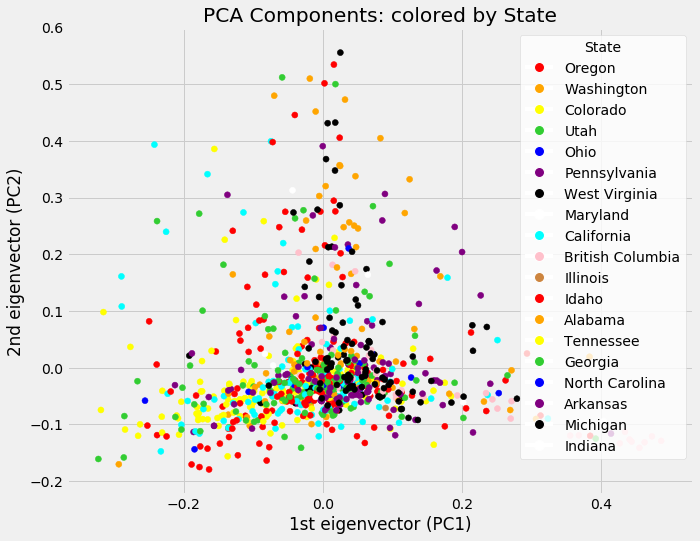

In [130]:
legend_elements2 = []
for state, color in state_dict.items():
    line = Line2D([0], [0], marker='o', color='w', label=state,
                          markerfacecolor=color, markersize=10)
    legend_elements2.append(line)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y2)
ax.set_title("PCA Components: colored by State")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)")
ax.legend(handles=legend_elements2, facecolor='w', title='State')

fig.savefig('../images/st_PCA_region.png');